In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train_df = pd.read_csv('train.csv')
df_copy = train_df.copy()
print(df_copy.head())
print(df_copy.shape)
print(df_copy.info())


   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Siz

In [26]:
# Check for duplicates based on all columns
duplicates = df_copy.duplicated()

# Check if any duplicates exist
if duplicates.any():
  print("Yes, there are duplicates.")
else:
  print("No, there are no duplicates.")



No, there are no duplicates.


In [27]:

# Check for missing values in each column
missing_values = df_copy.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

# Check if any missing values exist
if missing_values.any():
  print("\nYes, there are missing values.")
else:
  print("\nNo, there are no missing values.")


Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

No, there are no missing values.


In [28]:
import pandas as pd

# Function to detect and print outliers using IQR method
def detect_and_print_outliers_iqr(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_values = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"Outliers in '{column}': {outlier_values.tolist()}")

# Detect and print outliers
detect_and_print_outliers_iqr(df_copy)


Outliers in 'Employee ID': []
Outliers in 'Age': []
Outliers in 'Years at Company': [48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 49, 48, 48, 50, 48, 48, 49, 48, 48, 49, 49, 50, 50, 49, 48, 49, 48, 48, 48, 50, 51, 50, 49, 48, 50, 50, 48, 48, 50, 49, 49, 48, 49, 48, 48, 48, 49, 49, 48, 48, 49, 49, 49, 51, 48, 51, 48, 49, 49, 48, 50, 50, 51, 49, 49, 48,

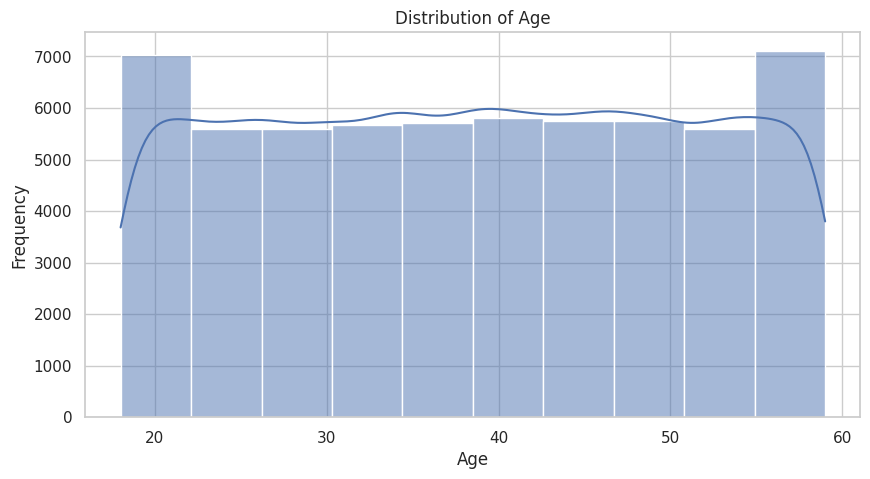

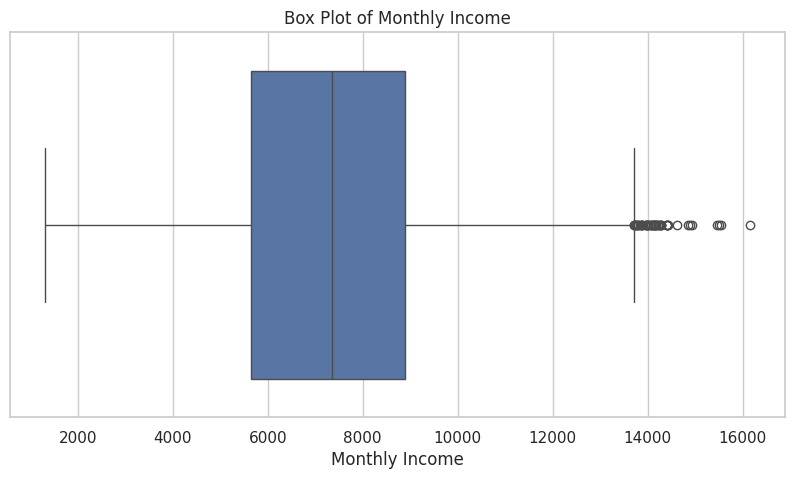

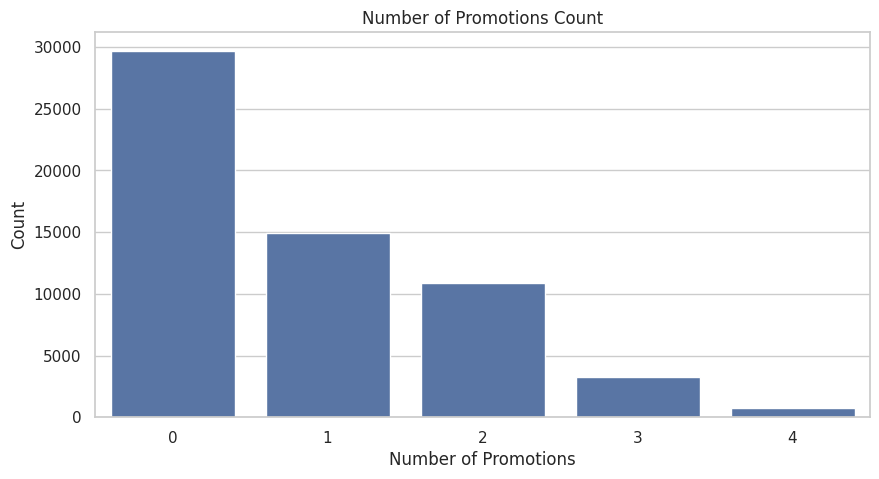

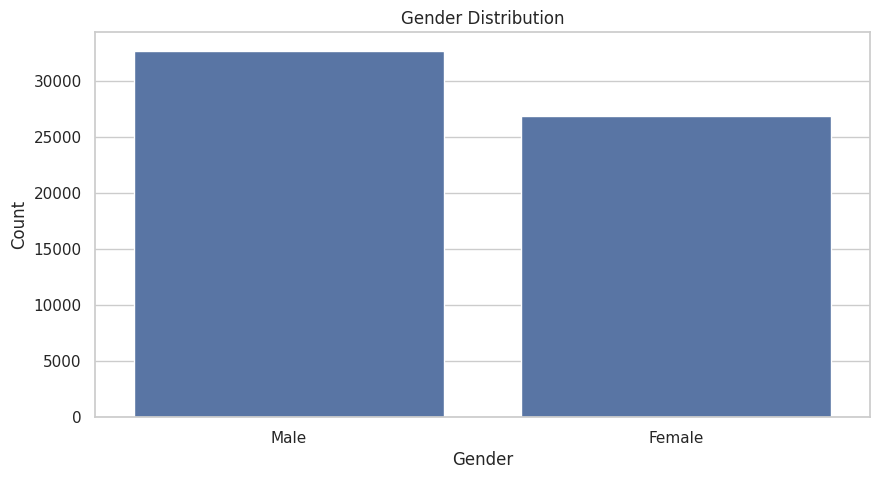

In [19]:
#initial visualizations
sns.set(style='whitegrid')

# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(df_copy['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Monthly Income
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_copy['Monthly Income'])
plt.title('Box Plot of Monthly Income')
plt.xlabel('Monthly Income')
plt.show()

# Bar Plot for Number of Promotions
plt.figure(figsize=(10, 5))
sns.countplot(x='Number of Promotions', data=df_copy)
plt.title('Number of Promotions Count')
plt.xlabel('Number of Promotions')
plt.ylabel('Count')
plt.show()

# Bar Plot for Gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df_copy)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [35]:
print(df_copy['Work-Life Balance'].unique())
print(df_copy['Job Satisfaction'].unique())
print(df_copy['Performance Rating'].unique())
print(df_copy['Attrition'].unique())


['Excellent' 'Poor' 'Good' 'Fair']
['Medium' 'High' 'Very High' 'Low']
['Average' 'Low' 'High' 'Below Average']
['Stayed' 'Left']


In [36]:
# Encoding mapping for categorical variables
work_life_balance_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
job_satisfaction_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
performance_rating_mapping = {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4}
attrition_mapping = {'Stayed': 'yes', 'Left': 'no'}

# Apply mapping
df_copy['Work-Life Balance'] = df_copy['Work-Life Balance'].map(work_life_balance_mapping)
df_copy['Job Satisfaction'] = df_copy['Job Satisfaction'].map(job_satisfaction_mapping)
df_copy['Performance Rating'] = df_copy['Performance Rating'].map(performance_rating_mapping)
df_copy['Attrition'] = df_copy['Attrition'].map(attrition_mapping)

# Display the updated DataFrame
print(df_copy.head())

   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

   Work-Life Balance  Job Satisfaction  Performance Rating  \
0                  4                 2                   3   
1                  1                 3                   1   
2                  3                 3                   1   
3                  3                 3                   4   
4                  2                 4                   3   

   Number of Promotions  ... Number of Dependents  Job Level Company Size  \
0                     2  ...                    0        Mid       Medium   
1         